In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from keras.layers import RepeatVector, TimeDistributed

In [2]:
df = pd.read_csv(r"C:\Users\himan\Desktop\7th GAN\updataDataSets.csv", 
                 index_col='From Date', 
                 parse_dates=['From Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33067 entries, 2019-02-18 00:00:00 to 2022-12-31 00:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SL NO        33067 non-null  int64  
 1   PM2.5        31251 non-null  float64
 2   PM10         31790 non-null  float64
 3   NO           31396 non-null  float64
 4   NO2          32393 non-null  float64
 5   Nox          32616 non-null  float64
 6   NH3          31705 non-null  float64
 7   SO2          32592 non-null  float64
 8   CO           32616 non-null  float64
 9   Ozone        32473 non-null  float64
 10  Benzene      30961 non-null  float64
 11  Eth-Benzene  16450 non-null  float64
 12  MP-Xylene    22659 non-null  float64
 13  WS           31483 non-null  float64
 14  WD           31528 non-null  float64
 15  SR           20184 non-null  float64
 16  BP           21876 non-null  float64
 17  AT           31462 non-null  float64
 18  RF         

C:\Users\himan\AppData\Local\Temp\ipykernel_26360\4218735721.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(r"C:\Users\himan\Desktop\7th GAN\updataDataSets.csv",


In [3]:
print("Original Dataset:")
print(df.head())

Original Dataset:
                     SL NO  PM2.5   PM10    NO   NO2    Nox    NH3    SO2  \
From Date                                                                   
2019-02-18 00:00:00      1  58.04  81.06  1.81  6.40   9.66  27.18  13.77   
2019-02-18 01:00:00      2  60.00  82.39  1.91  6.08   9.70  26.46  13.64   
2019-02-18 02:00:00      3  55.50  73.42  2.22  6.71  10.86  27.06  13.64   
2019-02-18 03:00:00      4  66.56  96.04  2.79  7.00  12.10  26.34  13.72   
2019-02-18 04:00:00      5  67.08  97.21  3.29  9.45  15.53  25.16  13.80   

                       CO  Ozone  Benzene  Eth-Benzene  MP-Xylene    WS  \
From Date                                                                 
2019-02-18 00:00:00  0.49  15.73     0.92          NaN       0.33  1.86   
2019-02-18 01:00:00  0.44  18.36     0.84          NaN       0.29  1.54   
2019-02-18 02:00:00  0.44  34.54     0.77          NaN       0.23  0.66   
2019-02-18 03:00:00  0.45  31.85     0.82          NaN       0.21  

In [4]:
df = df.drop(columns=['SL NO'])

In [5]:
# Handling missing values
df = df.fillna(0) 

In [6]:
# Scaling the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

C:\Users\himan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\himan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

In [7]:
# Display the scaled dataset
print("\nScaled Dataset:")
print(pd.DataFrame(scaled_data, columns=df.columns).head())



Scaled Dataset:
      PM2.5     PM10        NO       NO2       Nox       NH3       SO2  \
0  0.062876  0.08106  0.004541  0.059791  0.027807  0.168757  0.079752   
1  0.065000  0.08239  0.004792  0.056801  0.027922  0.164287  0.078999   
2  0.060125  0.07342  0.005569  0.062687  0.031261  0.168012  0.078999   
3  0.072106  0.09604  0.006999  0.065396  0.034830  0.163542  0.079463   
4  0.072670  0.09721  0.008254  0.088285  0.044704  0.156215  0.079926   

         CO     Ozone   Benzene  Eth-Benzene  MP-Xylene        WS        WD  \
0  0.074242  0.091833  0.001872          0.0   0.000670  0.078448  0.699150   
1  0.066667  0.107187  0.001709          0.0   0.000589  0.064951  0.661852   
2  0.066667  0.201646  0.001567          0.0   0.000467  0.027836  0.600939   
3  0.068182  0.185942  0.001668          0.0   0.000426  0.025728  0.629064   
4  0.071212  0.140522  0.001506          0.0   0.000446  0.022775  0.702471   

         SR        BP        AT     RF  
0  0.000238  0.990492 

In [8]:

#def create_sequences(data, n_steps):
#    data = np.array(data)  # Convert to NumPy array
#    X, y = [], []
#    for i in range(len(data) - n_steps):
#        end_ix = i + n_steps
#        seq_x, seq_y = data[i:end_ix, :], data[end_ix, :]
#        X.append(seq_x)
#        y.append(seq_y)
#    X = np.array(X)
#    y = np.array(y)
#    return X, y


In [9]:
#no. of TS
n_steps = 99

In [10]:
# Function to create sequences for time series data

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps + 1):  # Corrected range
        end_ix = i + n_steps
        seq_x, seq_y = data[i:end_ix, :], data[end_ix-1, :]  # Corrected index
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)




In [11]:

# Assuming scaled_data and n_steps are defined
scaled_data = np.array(scaled_data)  # Convert to NumPy array if not already

X, y = create_sequences(scaled_data, n_steps)

# Reshape X to 2D
X_2d = X.reshape(X.shape[0], -1)

# Create DataFrames
df_X = pd.DataFrame(X_2d)


arr = np.random.random((32967, 1, 18))
desired_data = arr[:, :, 1]  # Accessing the second dimension of each element
df_y = pd.DataFrame(desired_data, columns=['target'])


# Display the shape of sequences
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (32969, 99, 18)
y shape: (32969, 18)


In [12]:
# Define the RCGAN architecture
def define_generator(latent_dim, n_outputs):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=latent_dim))
    model.add(RepeatVector(n_steps))
    model.add(LSTM(100, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(n_outputs, activation='sigmoid')))
    return model

In [13]:
def define_discriminator(n_inputs):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_inputs)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

In [14]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return model


In [15]:
# Define the latent dimension
latent_dim = 100

# Define the number of features in the dataset
n_features = X.shape[2]

In [16]:
# Create the generator, discriminator, and GAN models
generator = define_generator(latent_dim, n_features)
discriminator = define_discriminator(n_features)
gan_model = define_gan(generator, discriminator)

In [22]:
def smooth_positive_labels(y):
    return y - 0.1 + (np.random.random(y.shape) * 0.1)

def smooth_negative_labels(y):
    return y + np.random.random(y.shape) * 0.1

def train_rcgan_smooth_labels(generator, discriminator, gan_model, X, y, latent_dim, n_epochs=2000, n_batch=100):
    for i in range(n_epochs):
        ix = np.random.randint(0, X.shape[0], n_batch)
        X_real, y_real = X[ix], y[ix]

        noise = np.random.normal(0, 1, (n_batch, latent_dim))
        X_fake = generator.predict(noise)

        y_real_labels = smooth_positive_labels(np.ones((n_batch, 1)))
        y_fake_labels = smooth_negative_labels(np.zeros((n_batch, 1)))

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(X_real, y_real_labels)
        d_loss_fake = discriminator.train_on_batch(X_fake, y_fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (n_batch, latent_dim))
        y_gan = np.ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(noise, y_gan)

        if i % 100 == 0:
            print(f"Epoch {i}, D Loss: {d_loss[0]}, G Loss: {g_loss}")


In [23]:
# Train the RCGAN using the alternative training method
train_rcgan_smooth_labels(generator, discriminator, gan_model, X, y, latent_dim, n_epochs=10000, n_batch=128)

4/4 [==============================] - 0s 19ms/step



Epoch 0, D Loss: 0.7021421194076538, G Loss: 0.7458377480506897
4/4 [==============================] - 0s 18ms/step
Epoch 100, D Loss: 6559.49658203125, G Loss: 192712.71875
4/4 [==============================] - 0s 18ms/step
Epoch 200, D Loss: 738.5425262451172, G Loss: 360.19561767578125
4/4 [==============================] - 0s 18ms/step
Epoch 300, D Loss: 265336.6171875, G Loss: 1206188.625
4/4 [==============================] - 0s 18ms/step
Epoch 400, D Loss: 611078.7890625, G Loss: 0.0
4/4 [==============================] - 0s 18ms/step
Epoch 500, D Loss: 12582.392400026321, G Loss: 0.5837386846542358
4/4 [==============================] - 0s 18ms/step
Epoch 600, D Loss: 375.27389135956764, G Loss: 0.8195513486862183
4/4 [==============================] - 0s 19ms/step
Epoch 700, D Loss: 84.7288077622652, G Loss: 0.9636882543563843
4/4 [==============================] - 0s 19ms/step
Epoch 800, D Loss: 1749.760703921318, G Loss: 1.1316165924072266
4/4 [=============================

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

4/4 [==============================] - 0s 18ms/step


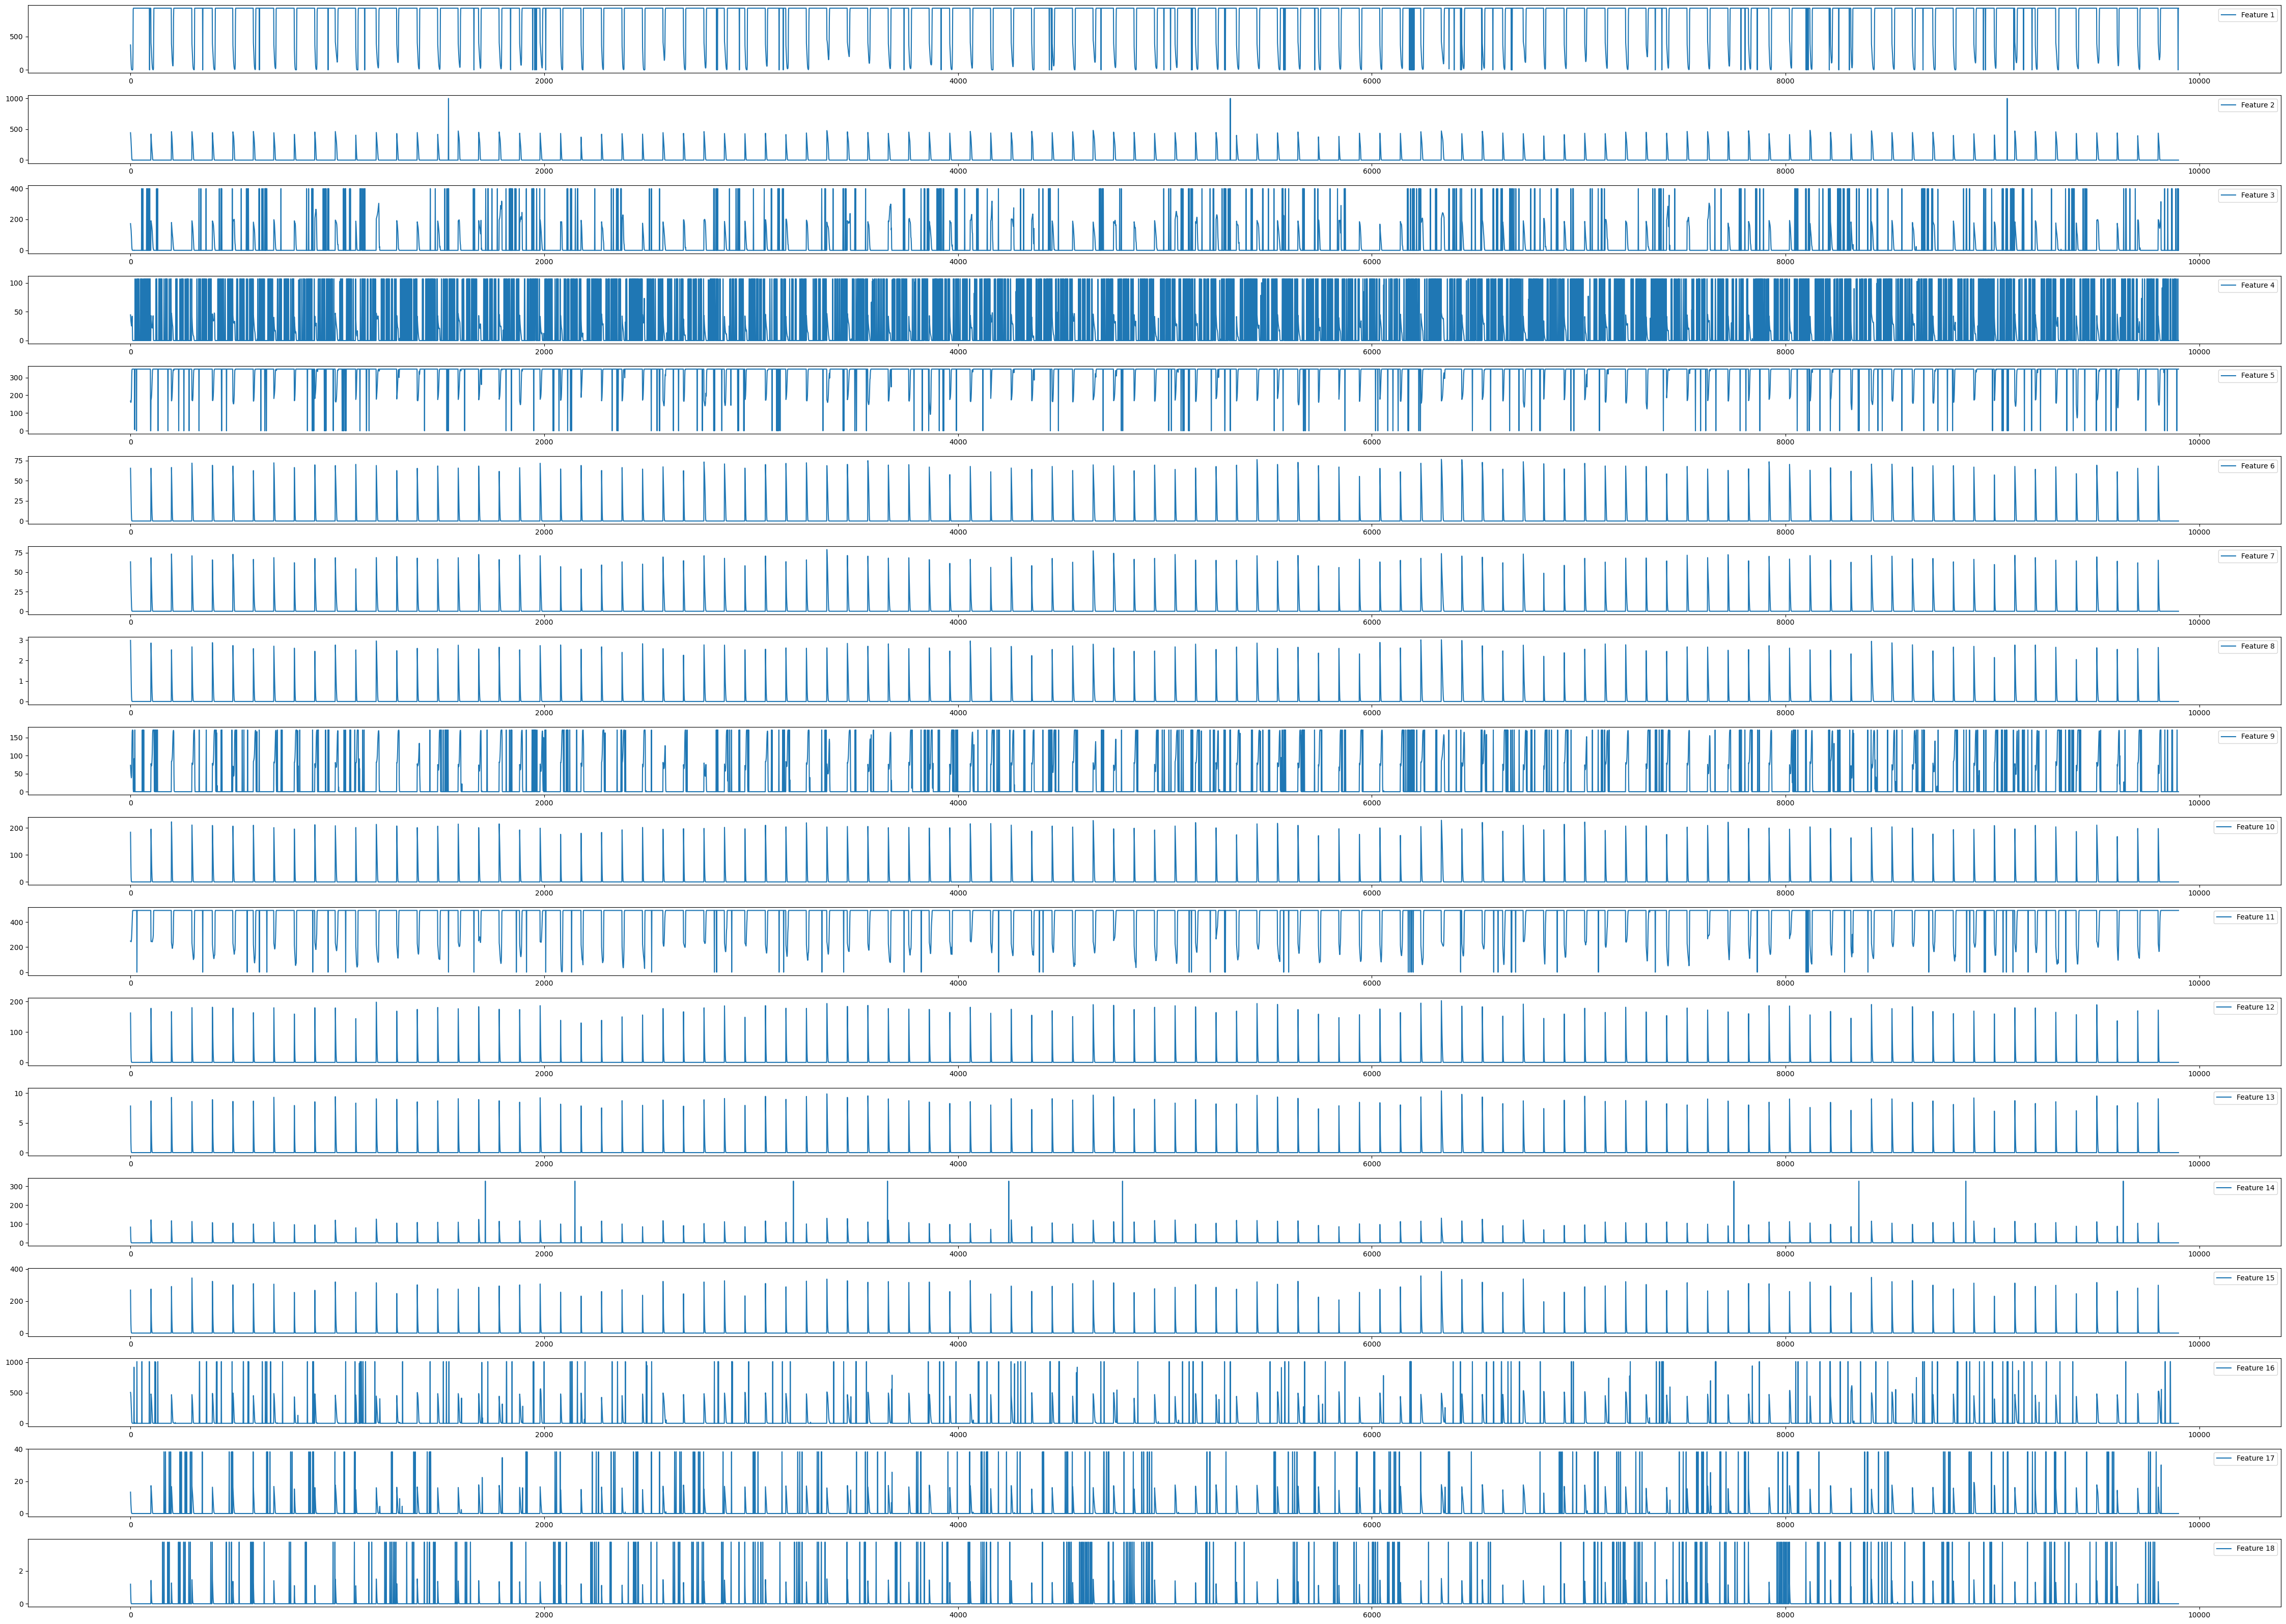

In [25]:
# Function to generate synthetic time series data
def generate_synthetic_data(generator, latent_dim, n_samples):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    generated_data = generator.predict(noise)
    return generated_data

# Number of samples to generate
n_samples_to_generate = 100

# Generate synthetic data
generated_data = generate_synthetic_data(generator, latent_dim, n_samples_to_generate)

# Invert the scaling to get the original values
generated_data_original = scaler.inverse_transform(generated_data.reshape(-1, generated_data.shape[2]))

# Plot the generated data
plt.figure(figsize=(45, 32))
for i in range(generated_data_original.shape[1]):
    plt.subplot(generated_data_original.shape[1], 1, i+1)
    plt.plot(generated_data_original[:, i], label=f'Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()